In [1]:
Importing data

In [ ]:
import rasterio
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
data=pd.read_excel('new_without B1 and B9.xlsx')
x=data.drop (columns=["Target"])
y=data ["Target"]
x=x.to_numpy ()
y=y.to_numpy ()
y=y.reshape (y.shape [0], 1)
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state =42)

Decision Tree model

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       335
           1       0.78      0.81      0.80       118

    accuracy                           0.89       453
   macro avg       0.86      0.87      0.86       453
weighted avg       0.89      0.89      0.89       453



[Text(210.25975290697676, 210.645, 'X[8] <= 0.119\ngini = 0.397\nsamples = 1811\nvalue = [1317, 494]'),
 Text(123.09252906976745, 197.055, 'X[10] <= 0.516\ngini = 0.187\nsamples = 1379\nvalue = [1235, 144]'),
 Text(48.90610465116279, 183.465, 'X[11] <= 0.46\ngini = 0.084\nsamples = 1050\nvalue = [1004, 46]'),
 Text(45.79168604651163, 169.875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(52.020523255813956, 169.875, 'X[11] <= 0.47\ngini = 0.077\nsamples = 1046\nvalue = [1004, 42]'),
 Text(23.358139534883723, 156.285, 'X[5] <= 0.098\ngini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(20.24372093023256, 142.695, 'X[10] <= 0.478\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(17.129302325581396, 129.10500000000002, 'X[3] <= 0.067\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(14.014883720930234, 115.515, 'X[8] <= 0.072\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(10.90046511627907, 101.925, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(17.129302325581396, 101

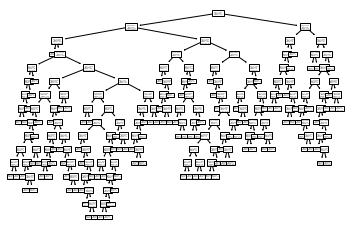

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#import graphviz
model = DecisionTreeClassifier ()
model = model.fit (x_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
pred=model.predict (x_test)
report = classification_report (y_test, pred)
print (report)

In [35]:
# confusion_matrix (pred, y_test)

array([[242,  10],
       [ 18, 125]], dtype=int64)

Naive Bays model

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB ()
model = model.fit (x_train, y_train)
from sklearn.metrics import classification_report
pred=model.predict (x_test)
report = classification_report (y_test, pred)
print (report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       335
           1       0.64      0.78      0.70       118

    accuracy                           0.83       453
   macro avg       0.78      0.81      0.79       453
weighted avg       0.84      0.83      0.83       453



C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
# confusion_matrix (pred, y_test)

array([[242,  27],
       [ 18, 108]], dtype=int64)

Support Vector Machine (SVM) model

In [2]:
from sklearn.svm import SVC
model = SVC(C=1000)
model =model.fit (x_train, y_train)
from sklearn.metrics import classification_report
pred=model.predict (x_test)
report = classification_report (pred, y_test)
print (report)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       335
           1       0.89      0.89      0.89       118

    accuracy                           0.94       453
   macro avg       0.93      0.93      0.93       453
weighted avg       0.94      0.94      0.94       453



C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
# confusion_matrix (pred, y_test)

array([[259,  14],
       [  1, 121]], dtype=int64)

Random Forest (RF) model

In [23]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier (n_estimators=150)
# model = model.fit (x_train, y_train)
# from sklearn.metrics import classification_report
# pred = model.predict (x_test)
# report = classification_report (pred, y_test)
# print (report)

<ipython-input-23-b4c37d7f3ad0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit (x_train, y_train)


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       346
           1       0.86      0.94      0.90       107

    accuracy                           0.95       453
   macro avg       0.92      0.95      0.93       453
weighted avg       0.95      0.95      0.95       453



In [45]:
# confusion_matrix (pred, y_test)

array([[254,  15],
       [  6, 120]], dtype=int64)

Apply for Imagery and Writing to the Disk 

In [5]:
data_1=rasterio.open ('1-6-2019.tif')
data_2=data_1.read ()
data_3=np.swapaxes (data_2, 0, 2)
data_3=np.swapaxes (data_3, 0, 1)
data_3 = data_3.reshape (data_3.shape [0]*data_3.shape [1], data_3.shape [2])
prediction = model.predict (data_3)
prediction=prediction.reshape (1,data_2.shape [1] , data_2.shape [2])
prediction=prediction.astype (np.int32)
with rasterio.open ('1-6-2019_NB_2.tif', 'w',
                    driver="GTiff", 
                   width=data_2.shape [2], 
                   height=data_2.shape [1],
                   count=1, 
                   crs=data_1.crs, 
                   transform=data_1.transform, 
                   dtype=rasterio.int32) as dst:
    dst.write (prediction)